In [ ]:
import sys
import re
import string
import pickle
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import joblib

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

import tweepy
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sb
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mbti_1.csv")
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
df.isnull().any()

type     False
posts    False
dtype: bool

In [ ]:
df.shape

(8675, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


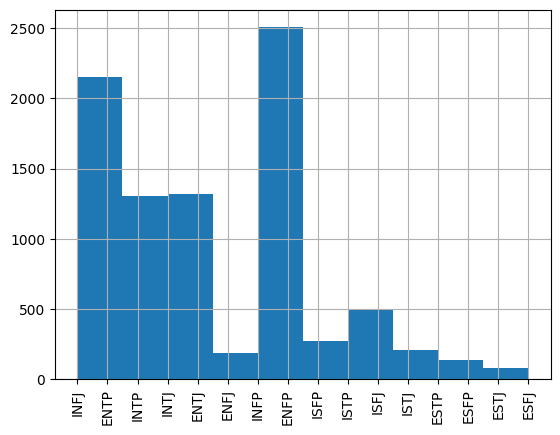

In [ ]:
print(df.type.value_counts())
df.type.hist(xrot=90)
plt.show()

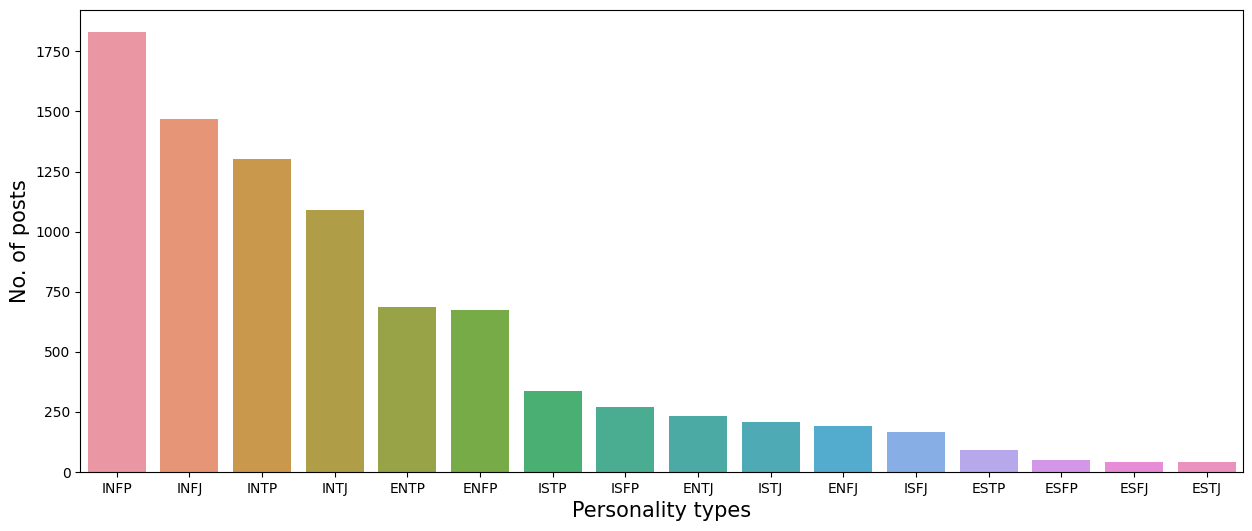

In [ ]:
graph = df['type'].value_counts()
plt.figure(figsize=(15,6))
sb.barplot(x=graph.index, y=graph.values, alpha=1)
plt.xlabel('Personality types', fontsize=15)
plt.ylabel('No. of posts', fontsize=15)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.6% of the points cannot be place

<Axes: xlabel='type', ylabel='words_per_comment'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 68.3% of the points cannot be plac

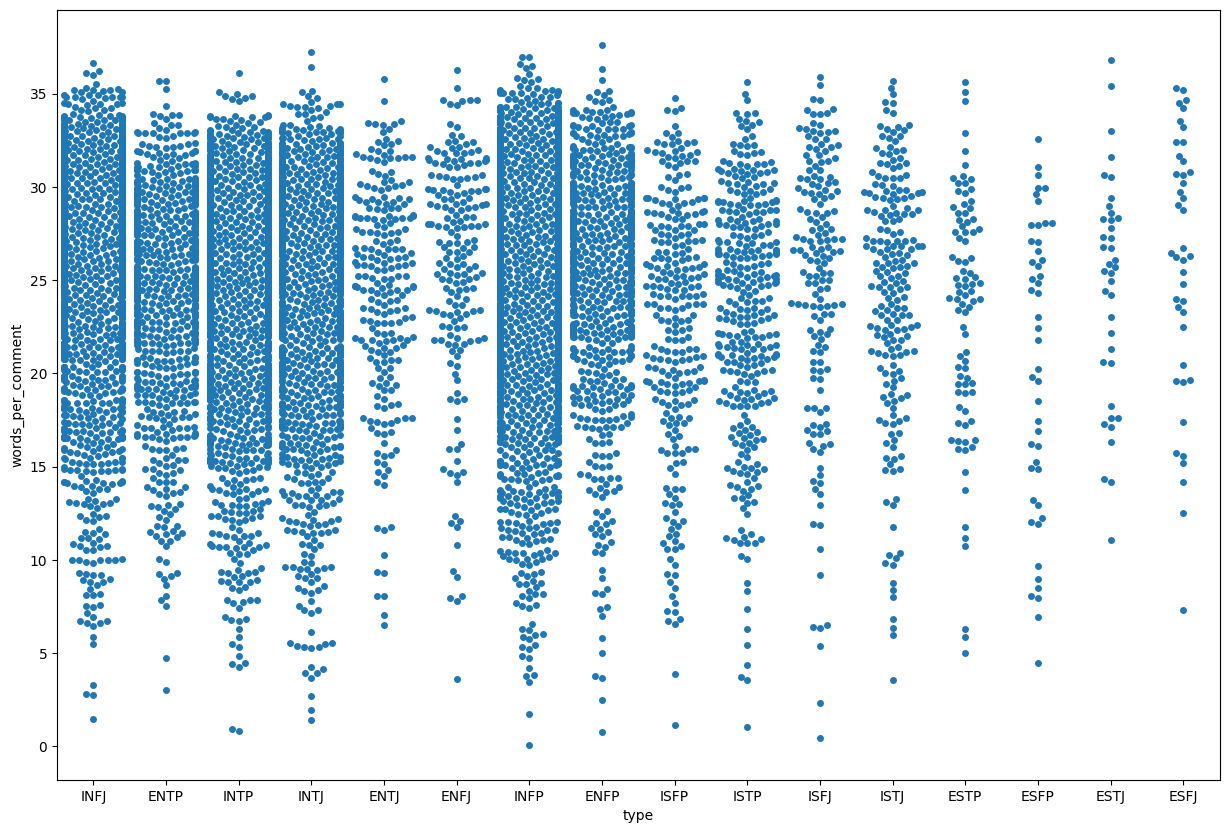

In [ ]:
df1 = df.copy()
#this function counts the no of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

df1['words_per_comment'] = df1['posts'].apply(lambda x: len(x.split())/50)
df1['variance_of_word_counts'] = df1['posts'].apply(lambda x: var_row(x))

plt.figure(figsize=(15,10))
sb.swarmplot(x="type", y="words_per_comment", data=df1)

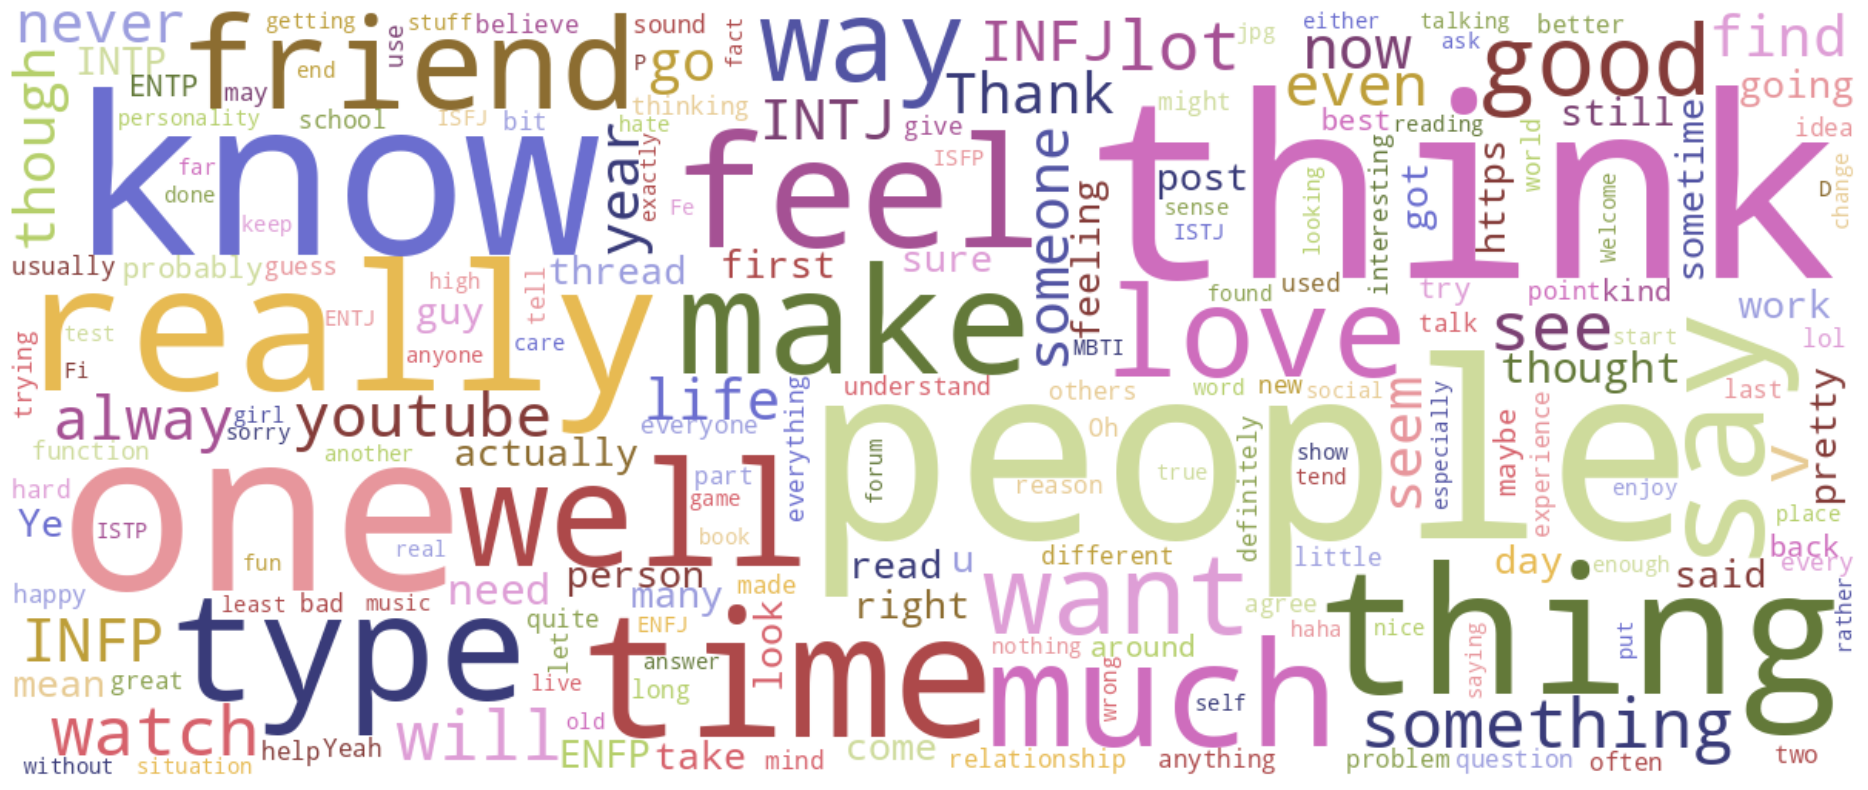

In [ ]:
words = list(df1["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

<ipython-input-14-f9fb043af18f>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k+1)


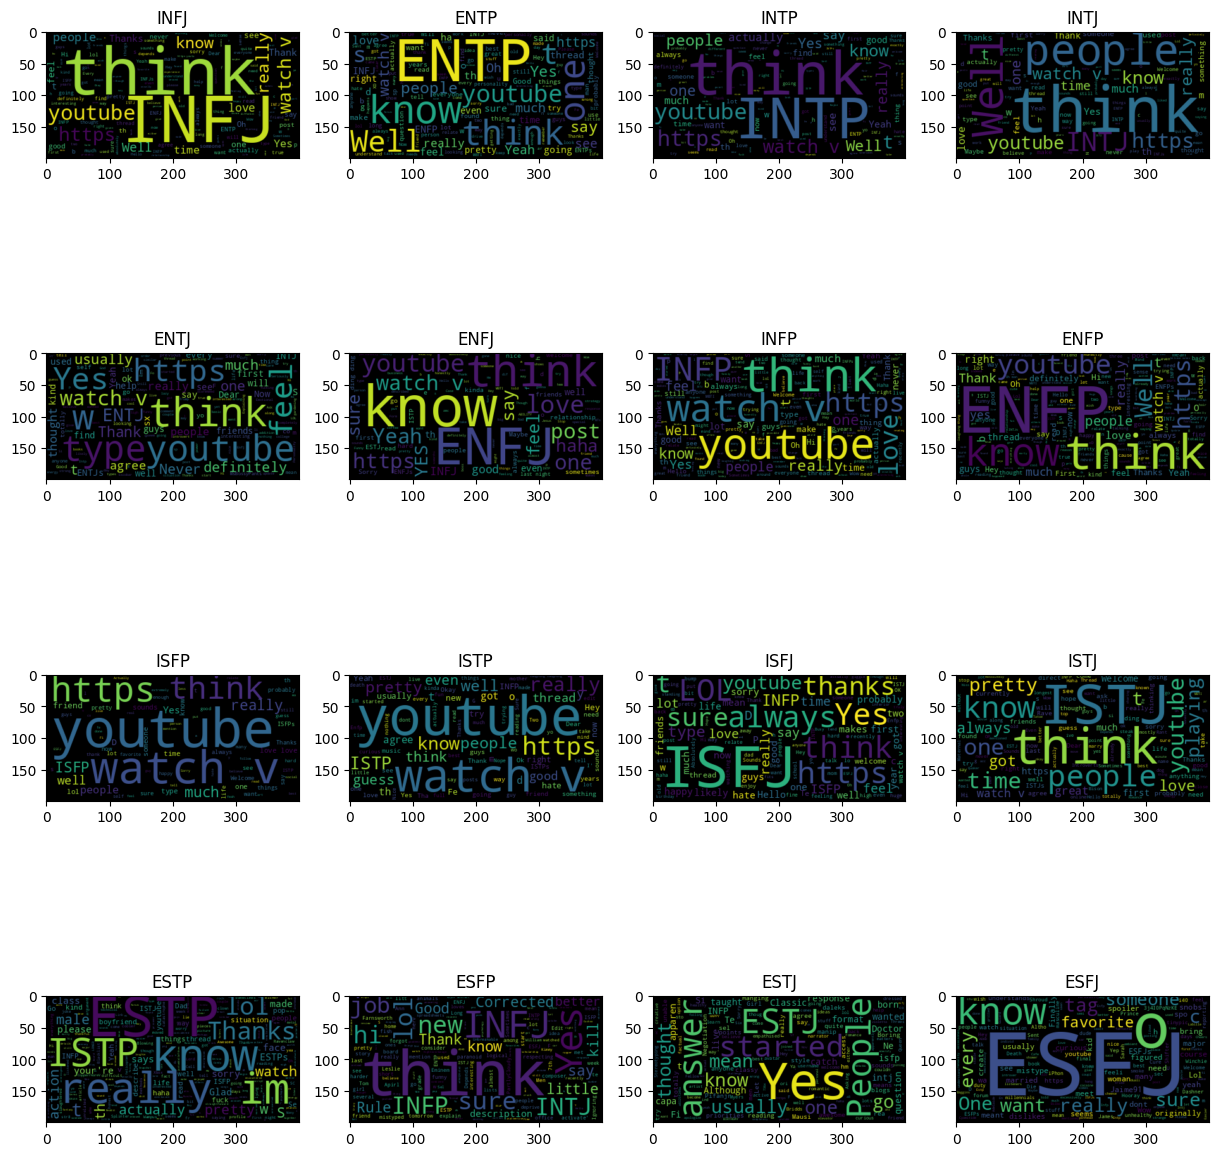

In [ ]:
fig, ax = plt.subplots(len(df1['type'].unique()), sharex=True, figsize=(15,len(df1['type'].unique())))
k = 0
for i in df1['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [ ]:
df['ie'] = df.type
df['ns'] = df.type
df['ft'] = df.type
df['pj'] = df.type

for i, t in enumerate(df.type):
    if 'I' in t:
        df.ie[i] = 'I'
    elif 'E' in t:
        df.ie[i] = 'E'
        
    if 'N' in t:
        df.ns[i] = 'N'
    elif 'S' in t:
        df.ns[i] = 'S'
        
    if 'F' in t:
        df.ft[i] = 'F'
    elif 'T' in t:
        df.ft[i] = 'T'
        
    if 'P' in t:
        df.pj[i] = 'P'
    elif 'J' in t:
        df.pj[i] = 'J'


posts = df.posts.values
yIE = df.ie.values
yNS = df.ns.values
yFT = df.ft.values
yPJ = df.pj.values
y = df.type

In [ ]:
print(posts.shape)

(8675,)


In [ ]:
print(df.head(5))

   type                                              posts ie ns ft pj
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...  I  N  F  J
1  ENTP  'I'm finding the lack of me in these posts ver...  E  N  T  P
2  INTP  'Good one  _____   https://www.youtube.com/wat...  I  N  T  P
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...  I  N  T  J
4  ENTJ  'You're fired.|||That's another silly misconce...  E  N  T  J


I    6676
E    1999
Name: ie, dtype: int64

N    7478
S    1197
Name: ns, dtype: int64

F    4694
T    3981
Name: ft, dtype: int64

P    5241
J    3434
Name: pj, dtype: int64



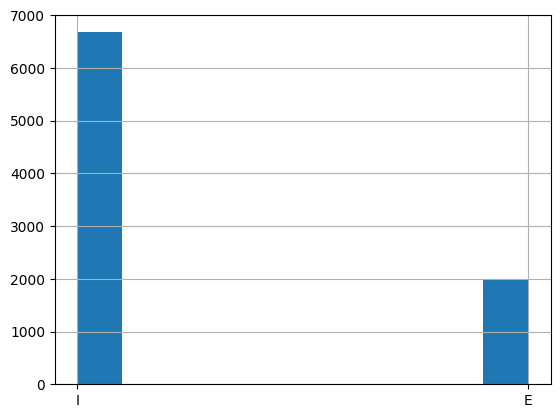

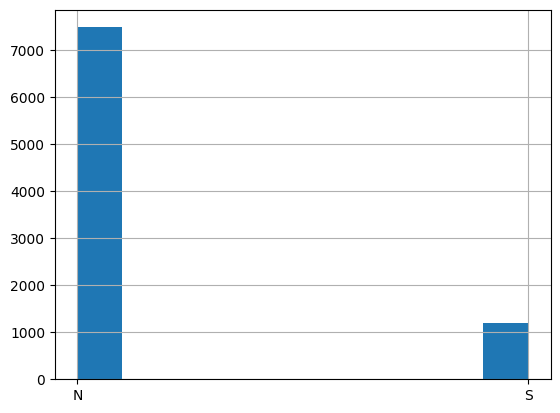

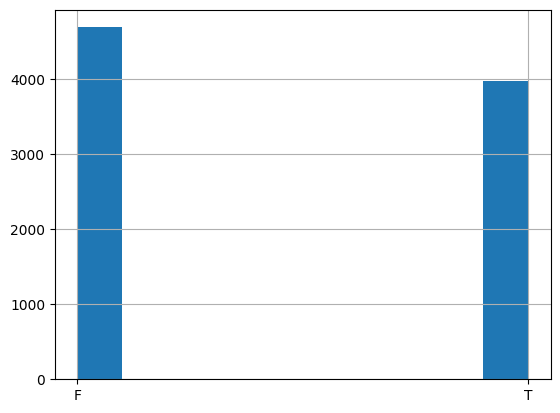

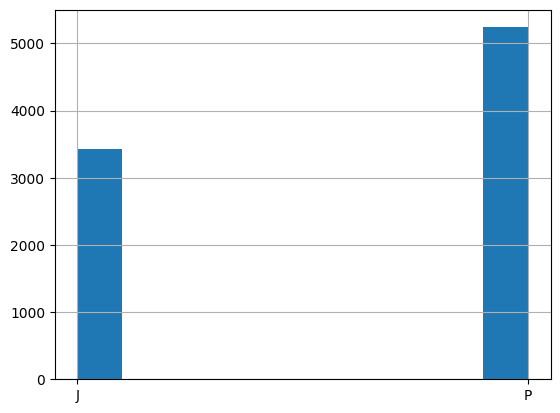

In [ ]:
print(df.ie.value_counts(), end='\n\n')
print(df.ns.value_counts(), end='\n\n')
print(df.ft.value_counts(), end='\n\n')
print(df.pj.value_counts(), end='\n\n')

df.ie.hist(); plt.show()
df.ns.hist(); plt.show()
df.ft.hist(); plt.show()
df.pj.hist(); plt.show()

In [ ]:
print ("Introversion (I) /  Extroversion (E):\t", df['ie'].value_counts()['I'], " / ", df['ie'].value_counts()['E'])
print ("Intuition (N) / Sensing (S):\t\t", df['ns'].value_counts()['N'], " / ", df['ns'].value_counts()['S'])
print ("Thinking (T) / Feeling (F):\t\t", df['ft'].value_counts()['F'], " / ", df['ft'].value_counts()['T'])
print ("Judging (J) / Perceiving (P):\t\t", df['pj'].value_counts()['P'], " / ", df['pj'].value_counts()['J'])

Introversion (I) /  Extroversion (E):	 6676  /  1999
Intuition (N) / Sensing (S):		 7478  /  1197
Thinking (T) / Feeling (F):		 4694  /  3981
Judging (J) / Perceiving (P):		 5241  /  3434


In [ ]:
regexes = [
    #urls
    #r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
    
    #html
    #r'<[^>]+>',
    
    #punctuation
    r'(?:(\w+)\'s)',
    
    r'(?:\s(\w+)\.+\s)',
    r'(?:\s(\w+),+\s)',
    r'(?:\s(\w+)\?+\s)',
    r'(?:\s(\w+)!+\s)',
    
    r'(?:\'+(\w+)\'+)',
    r'(?:"+(\w+)"+)',
    r'(?:\[+(\w+)\]+)',
    r'(?:{+(\w+)}+)',
    r'(?:\(+(\w+))',
    r'(?:(\w+)\)+)',

    #words containing numbers & special characters & punctuation
    r'(?:(?:(?:[a-zA-Z])*(?:[0-9!"#$%&\'()*+,\-./:;<=>?@\[\\\]^_`{|}~])+(?:[a-zA-Z])*)+)',
    
    #pure words
    r'([a-zA-Z]+)',
    
    #numbers
    #r'(?:(?:\d+,?)+(?:\.?\d+)?)',

    #emoticons
    #r"""(?:[:=;][oO\-]?[D\)\]\(\]/\\OpP])""",

    #other words
    #r'(?:[\w_]+)',

    #anything else
    #r'(?:\S)'
]

#compiling regular expression
regex = re.compile(r'(?:'+'|'.join(regexes)+')', re.VERBOSE | re.IGNORECASE)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess(documents):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    
    #fetching list of stopwords
    punctuation = list(string.punctuation)
    swords = stopwords.words('english') + ['amp'] + ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'january', 'feburary', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december',  'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',  'jan', 'feb', 'mar', 'apr', 'may', 'jun' 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'tommorow', 'today', 'yesterday'] + ['mr', 'mrs']


    processed_documents = []
    for i,document in enumerate(documents):
        print('{0}/{1}'.format(i+1, len(documents)))
        
        #tokenization
        tokens = regex.findall(document)

        #skipping useless tokens
        t_regex = re.compile(r"[^a-zA-Z]")
        document = []
        
        for token in tokens:
            token = np.array(token)
            token = np.unique(token[token != ''])
            
            if len(token) > 0:
                token = token[0].lower()
            else:
                continue
                
            if re.search(t_regex, token) == None and token not in swords:
                token = lemmatizer.lemmatize(token)
                document.append(token)
                
        document = ' '.join(document)

        #skipping
        if len(document) >= 0:
            processed_documents.append(document)

    print()
    return np.array(processed_documents)

In [ ]:
%%time
posts = preprocess(posts)

Streaming output truncated to the last 5000 lines.
3679/8675
3680/8675
3681/8675
3682/8675
3683/8675
3684/8675
3685/8675
3686/8675
3687/8675
3688/8675
3689/8675
3690/8675
3691/8675
3692/8675
3693/8675
3694/8675
3695/8675
3696/8675
3697/8675
3698/8675
3699/8675
3700/8675
3701/8675
3702/8675
3703/8675
3704/8675
3705/8675
3706/8675
3707/8675
3708/8675
3709/8675
3710/8675
3711/8675
3712/8675
3713/8675
3714/8675
3715/8675
3716/8675
3717/8675
3718/8675
3719/8675
3720/8675
3721/8675
3722/8675
3723/8675
3724/8675
3725/8675
3726/8675
3727/8675
3728/8675
3729/8675
3730/8675
3731/8675
3732/8675
3733/8675
3734/8675
3735/8675
3736/8675
3737/8675
3738/8675
3739/8675
3740/8675
3741/8675
3742/8675
3743/8675
3744/8675
3745/8675
3746/8675
3747/8675
3748/8675
3749/8675
3750/8675
3751/8675
3752/8675
3753/8675
3754/8675
3755/8675
3756/8675
3757/8675
3758/8675
3759/8675
3760/8675
3761/8675
3762/8675
3763/8675
3764/8675
3765/8675
3766/8675
3767/8675
3768/8675
3769/8675
3770/8675
3771/8675
3772/8675
3773/8675

In [ ]:
print(posts[0])

intj moment sportscenter top ten play experience repeat perc experience immerse last thing infj friend posted facebook committing suicide next day rest sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth game wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier come three item determined type whichever type want would likely use given cognitive function whatnot left thing moderation sims indeed video game good one good one somewhat subjective completely promoting death given favorite video game growing current favorite video game appears late someone thought confidence good cherish time solitude revel within inner world whereas time workin enjoy time worry people always around entp lady complimentary main social outlet xbox live conversation even verbally fatigue really dig part thread requires high backyard roast eat marshmellows backyard conversing something int

In [ ]:
%%time

#TF-IDF representation
# creating document frequency matrix
cv = CountVectorizer().fit(posts)
X = cv.transform(posts)

CPU times: user 9.73 s, sys: 246 ms, total: 9.97 s
Wall time: 10.2 s


In [ ]:
tf = TfidfTransformer()

In [ ]:
X_tf=  tf.fit_transform(X).toarray()

In [ ]:
print(X)

  (0, 1219)	1
  (0, 1295)	1
  (0, 2038)	1
  (0, 3138)	1
  (0, 3474)	1
  (0, 3653)	1
  (0, 3774)	3
  (0, 4656)	1
  (0, 4912)	1
  (0, 5015)	2
  (0, 5825)	1
  (0, 5834)	1
  (0, 5894)	1
  (0, 6341)	1
  (0, 6481)	1
  (0, 7070)	1
  (0, 9853)	1
  (0, 9857)	1
  (0, 10137)	1
  (0, 10524)	1
  (0, 11250)	2
  (0, 11327)	1
  (0, 11769)	1
  (0, 12026)	1
  (0, 12163)	1
  :	:
  (8674, 70444)	1
  (8674, 70491)	1
  (8674, 71915)	1
  (8674, 72008)	6
  (8674, 72010)	1
  (8674, 72012)	1
  (8674, 72152)	2
  (8674, 72157)	1
  (8674, 72236)	1
  (8674, 72352)	3
  (8674, 72490)	3
  (8674, 72703)	1
  (8674, 72809)	3
  (8674, 73051)	1
  (8674, 73160)	2
  (8674, 73227)	1
  (8674, 73327)	1
  (8674, 73415)	2
  (8674, 73608)	3
  (8674, 73623)	1
  (8674, 73649)	5
  (8674, 73717)	5
  (8674, 73818)	2
  (8674, 73966)	1
  (8674, 74569)	1


In [ ]:
posts.shape, X.shape, X_tf.shape, yIE.shape, yNS.shape

((8675,), (8675, 75072), (8675, 75072), (8675,), (8675,))

In [ ]:
print("X: 1st posts in tf-idf representation\n%s" % X_tf[0])

X: 1st posts in tf-idf representation
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
xIETrain, xIETest, yIETrain, yIETest = train_test_split(X, yIE)
xNSTrain, xNSTest, yNSTrain, yNSTest = train_test_split(X, yNS)
xFTTrain, xFTTest, yFTTrain, yFTTest = train_test_split(X, yFT)
xPJTrain, xPJTest, yPJTrain, yPJTest = train_test_split(X, yPJ)
xTrain, xTest, yTrain, yTest = train_test_split(X, y)

In [ ]:
model = MultinomialNB().fit(xTrain, yTrain)
ieModel = MultinomialNB().fit(xIETrain, yIETrain)
nsModel = MultinomialNB().fit(xNSTrain, yNSTrain)
ftModel = MultinomialNB().fit(xFTTrain, yFTTrain)
pjModel = MultinomialNB().fit(xPJTrain, yPJTrain)

In [ ]:
print(model.score(xTest, yTest))
print(ieModel.score(xIETest, yIETest))
print(nsModel.score(xNSTest, yNSTest))
print(ftModel.score(xFTTest, yFTTest))
print(pjModel.score(xPJTest, yPJTest))

0.4001844167819272
0.7690179806362379
0.8547717842323651
0.8155832180728446
0.72706316274781


In [ ]:
print('MINORITY CLASSES:')
print(recall_score(yIETest, ieModel.predict(xIETest), pos_label='E'))
print(recall_score(yNSTest, nsModel.predict(xNSTest), pos_label='S'))
print(recall_score(yFTTest, ftModel.predict(xFTTest), pos_label='T'))
print(recall_score(yPJTest, pjModel.predict(xPJTest), pos_label='J'), end='\n\n')

#majority classes
print('MAJORITY CLASSES:')
print(recall_score(yIETest, ieModel.predict(xIETest), pos_label='I'))
print(recall_score(yNSTest, nsModel.predict(xNSTest), pos_label='N'))
print(recall_score(yFTTest, ftModel.predict(xFTTest), pos_label='F'))
print(recall_score(yPJTest, pjModel.predict(xPJTest), pos_label='P'))

MINORITY CLASSES:
0.22328244274809161
0.07142857142857142
0.7576923076923077
0.5160183066361556

MAJORITY CLASSES:
0.9428571428571428
0.9776
0.8689105403011514
0.8694980694980695


In [ ]:
print('MINORITY CLASSES:')
print(f1_score(yIETest, ieModel.predict(xIETest), pos_label='E'))
print(f1_score(yNSTest, nsModel.predict(xNSTest), pos_label='S'))
print(f1_score(yFTTest, ftModel.predict(xFTTest), pos_label='T'))
print(f1_score(yPJTest, pjModel.predict(xPJTest), pos_label='J'), end='\n\n')

#majority classes
print('MAJORITY CLASSES:')
print(f1_score(yIETest, ieModel.predict(xIETest), pos_label='I'))
print(f1_score(yNSTest, nsModel.predict(xNSTest), pos_label='N'))
print(f1_score(yFTTest, ftModel.predict(xFTTest), pos_label='F'))
print(f1_score(yPJTest, pjModel.predict(xPJTest), pos_label='P'))

MINORITY CLASSES:
0.3183673469387755
0.11764705882352941
0.7975708502024291
0.6037483266398929

MAJORITY CLASSES:
0.8609492089925063
0.9208741522230596
0.8306519898391194
0.7918424753867791


In [ ]:
scores = []

scores.append(cross_val_score(estimator=model, cv=10, X=X, y=y, scoring='accuracy'))
scores.append(cross_val_score(estimator=ieModel, cv=10, X=X, y=LabelEncoder().fit_transform(yIE), scoring='recall'))
scores.append(cross_val_score(estimator=nsModel, cv=10, X=X, y=LabelEncoder().fit_transform(yNS), scoring='recall'))
scores.append(cross_val_score(estimator=ftModel, cv=10, X=X, y=LabelEncoder().fit_transform(yFT), scoring='recall'))
scores.append(cross_val_score(estimator=pjModel, cv=10, X=X, y=LabelEncoder().fit_transform(yPJ), scoring='recall'))

#prining mean and standard deviations for each model
for score in scores:
    print(score.mean())
    print(score.std(), end='\n\n')

0.4141782139800892
0.013105035769141033

0.939333327348302
0.0098859861657264

0.12530112044817926
0.025225019890865

0.7578519162227176
0.02011073892976753

0.8328549618320611
0.01209350166295453



In [ ]:
my_posts ="hy by i student name pulkit student pulkit student student pulkit hy by i am"
my_posts = [my_posts]
mydata = pd.DataFrame(data={'type': ['xxxx'], 'posts': [my_posts]})

document = cv.transform(my_posts)

print(document)

  (0, 2057)	1
  (0, 43977)	1
  (0, 63431)	4


In [ ]:
print(ieModel.predict(document))
print(nsModel.predict(document))
print(ftModel.predict(document))
print(pjModel.predict(document))

['I']
['N']
['T']
['P']


In [ ]:
import pickle as pkl

In [ ]:
pkl_filename1 = 'iemodel.pkl'
pkl_filename2 = 'nsmodel.pkl'
pkl_filename3 = 'ftmodel.pkl'
pkl_filename4 = 'pjmodel.pkl'
Model_pkl1 = open(pkl_filename1, 'wb')
Model_pkl2 = open(pkl_filename2, 'wb')
Model_pkl3 = open(pkl_filename3, 'wb')
Model_pkl4 = open(pkl_filename4, 'wb')
pkl.dump(ieModel, Model_pkl1)
pkl.dump(nsModel, Model_pkl2)
pkl.dump(ftModel, Model_pkl3)
pkl.dump(pjModel, Model_pkl4)
Model_pkl1.close()
Model_pkl2.close()
Model_pkl3.close()
Model_pkl4.close()